<a href="https://colab.research.google.com/github/nbche/AIFFEL_quest_cr/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B8_02_30_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

가랏 몬스터 - 머신러닝 메이 퀘스트 02 는 아래의 내용으로 구성됨

Step 1. 데이터 개괄

Step 2. 기본 모델 구현 및 분석

Step 3 & 4. 탐색적 데이터 분석 & 데이터 전처리

Step 5. 베이스라인 모델 구현 및 분석

Step 6. 비교 모델 모델 구현 및 분석


--------------------------------------------------------------------------------------------------------------------------------------------

**< Step 1. 데이터 개괄 >**

- 개체수: 721 Pokemon
- 변수 개수: 총 11개
(#, Name, Type 1, Type 2, Total, HP, Attack, Defense, SP Atk, SP Def. Speed)
- 전체 데이터 세트 : 800*13 임을 알 수 있음 (Step 1-2 참조)
- 데이터 세트 분류 : 전설의 포켓몬과 일반 포켓몬으로 구분. 총 65개가 전설이며, 735개가 일반 포켓몬임 (Step 1-3 참조)

In [ ]:
## Step 1-1. 라이브러리 가져오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Step 1-2. 데이터 불러오기 & 복사하기
original_data = pd.read_csv('Pokemon.csv') ### 데이터 불러오기 - Original Data 는 기본 모델에서 사용 예정
pokemon = original_data.copy()             ### 데이터 복사하기 - pokemon 자료는 베이스라인과 비교 모델에서 사용 예정임
print(pokemon.shape)

(800, 13)


In [ ]:
## Step 1-3. 데이터 셋트를 전설과 일반 그룹으로 나누기
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)   ### 전설의 포켓몬 그룹
print(legendary.shape)
print(legendary.head())
print('-'*50)
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)   ### 일반 포켓몬 그룹
print(ordinary.shape)
print(ordinary.head())

(65, 13)
     #                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3      154       90    130           1       True  
4      154      100    130           1       True  
--------------------------------------------------
(735, 13)
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49  

--------------------------------------------------------------------------------------------------------------------------------------------------------------
**< Step 2. 기본 모델 (Basic model) 구현 및 분석 >**
- 모델: Decesion Tree
- 사용 모듈: Scikit-learn
- 분석 결과는 정확도가 95% 를 보이나, 재현율이 62% 로 False Negative의 값이 크게 나타남 (Step 2-5 참조)

In [ ]:
## Step 2-1. Features 과 Taget 설정
print(original_data.columns)
print(original_data.head())
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
### 의미 없는 컬럼인 '#'와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하고 features 를 8개로 선정함
target = 'Legendary'   ### 구분의 타겟을 선정

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [ ]:
## Step 2-2. Fetaures 과 Target 데이터생성
X_b = original_data[features] ### 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장. 알파벳 b 는 basic 모델을 위한 데이터임을 뜻함.
print(X_b.shape)
print(X_b.head())

y_b = original_data[target] ### 'target' 컬럼의 데이터를 변수 'y'에 저장함. 알파벳 b 는 basic 모델을 위한 데이터임을 뜻함.
print(y_b.shape)
print(y_b.head())

(800, 8)
   Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0    318  45      49       49       65       65     45           1
1    405  60      62       63       80       80     60           1
2    525  80      82       83      100      100     80           1
3    625  80     100      123      122      120     80           1
4    309  39      52       43       60       50     65           1
(800,)
0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool


In [ ]:
## Step 2-3. 기본 모델을 Train / Test 그룹으로 구분
from sklearn.model_selection import train_test_split

X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.2, random_state=15)
print(X_b_train.shape, y_b_train.shape)
print(X_b_test.shape, y_b_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [ ]:
## Step 2-4. 기본 모델을 DecisionTree 방식을 통해 훈련/예측
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=25)
model.fit(X_b_train, y_b_train)
y_b_pred = model.predict(X_b_test)

In [ ]:
## Step 2-5. 예측 결과 분석
from sklearn.metrics import confusion_matrix  ### confusion matrix 사용
print(confusion_matrix(y_b_test, y_b_pred))
print('*'*20)
from sklearn.metrics import accuracy_score ## accuracy_score 함수를 불러오기
accuracy_b = accuracy_score(y_b_test, y_b_pred) ## 정확도 측정
print(accuracy_b)
print('*'*20)
from sklearn.metrics import classification_report   ### classification report 사용
print(classification_report(y_b_test, y_b_pred))
print('*'*20)

[[144   3]
 [  5   8]]
********************
0.95
********************
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160

********************


#### Step 2-6. 예측 결과 분석

--------------------------------------------------------------------------------------------------------------------------------------------------------------
**< Step 3. 탐색적 데이터 분석 & 전처리 >**

1) 데이터 번호 (#)
전체 데이터는 총 800개인데 #컬럼을 집합으로 만든 자료형은 그보다 작은 721개임. 따라서 데이터번호는 unique하지 않으며 index로 쓸 수도 없음

2) 이름
- 중복을 제거한 유일성을 조사한 결과, 전체 데이터 사이즈 800 개와 동일함을 알 수 있음  (Step 3-1 참조)
- 이름이 반복적으로 사용되는 경향이 있고, 전설의 포켓몬 이름의 반복 사용시, 이를 사용하는 포켓몬도 전설의 포켓몬임
- 전설의 포켓몬은 이름이 10자리 이상 (특히 16자리) 이상일 확률이 41.54% 임 (Step 3-1 참조)
- 전설의 포켓몬은 이름 중에 어떤 특정 단어 (예를 들면 Forme) 를 공유하는 경우가 있음. 특정 단어를 토큰이라 지칭토록 함 (Step 3-3 참조)

3) 속성 (Type 1, 2)
- Type 1에는 총 18가지, Type 2에는 총 19가지의 속성이 들어가 있으며, 둘의 차집합은 NaN 인 것으로, NaN 데이터 외의 나머지 18가지 속성은 Type 1, Type 2 모두 같다고 결론 내림 (Step 3-2 참조)
- 속성의 범주형 데이터를 One-hot coding 방식으로 전처리하기 (Step 3-4 참조)


4) Total 값
- Total 값은 일반 포켓몬이 전설의 포켓몬보다 두배 정도로 다양함
- 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합 (총 9개의 값) 에 포함되는지 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미침
- 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재함 ex) 660, 680, 720, 770, 780
- 즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 수 있음



In [ ]:
## Step 3-1. 변수 "이름"의 검토
print(len(set(pokemon["Name"])))    ### 전체 데이터 사이즈인 800과 동일함을 확인 가능.
pokemon['name_count'] = pokemon['Name'].apply(lambda x: len(x)) ### 포켓몬 이름 길이 확인
pokemon['long_name'] = pokemon['name_count'] > 10  ## 이름이 10자리 이상인 경우, long_name 으로 새로운 변수 생성

800


In [ ]:
## Step 3-2. 변수 "속성 (Type 1, 2)"의 검토
print(list(set(pokemon["Type 1"])))   ### Type 1 의 변수값
print(len(list(set(pokemon["Type 1"]))))   ### Type 1 의 변수 개수
print(list(set(pokemon["Type 2"])))   ### Type 2 의 변수값
print(len(list(set(pokemon["Type 2"]))))   ### Type 1 의 변수 개수

len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))
print(set(pokemon["Type 2"]) - set(pokemon["Type 1"])) ### Type 1 과 2 의 차집합 확인

['Dragon', 'Grass', 'Ground', 'Poison', 'Fairy', 'Water', 'Psychic', 'Flying', 'Steel', 'Dark', 'Fire', 'Fighting', 'Normal', 'Rock', 'Electric', 'Bug', 'Ghost', 'Ice']
18
[nan, 'Ground', 'Steel', 'Grass', 'Dark', 'Fighting', 'Bug', 'Fire', 'Dragon', 'Poison', 'Fairy', 'Psychic', 'Flying', 'Rock', 'Ghost', 'Water', 'Normal', 'Electric', 'Ice']
19
{nan}


In [ ]:
## Step 3-3-1. 변수 "이름" 전처리
### 목표는 문자 (즉, 알파벳)으로 구성된 값을 갖는 것임
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))  ###알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어줌
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha()) ### isalpha 를 통해 알파벳으로만 구성여부를 참/거짓으로 확인함
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,False,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [ ]:
## Step 3-3-2. 변수 "이름" 전처리
### 앞의 단계에서 수정의 필요를 발견한 9건의 데이터에 대한 수정 처리 실행 (특수 문자에 대한 조정)

pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
print(pokemon[pokemon["name_isalpha"] == False].shape)  ### 특수 문자를 포함한 경우가 없음에 대한 재확인

(0, 17)


In [ ]:
## Step 3-3-3. 변수 "이름" 전처리
###  긴이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기

import re               ### 정규식 re 모듈 사용

def tokenize(name):     ### 토큰화 함수 정의
    tokens = []
    name_split = name.split(" ")
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

all_tokens = list(legendary["Name"].apply(tokenize).values)   ### 전체 이름 대상으로 토큰 세트 생성
token_set = []
for token in all_tokens:
    token_set.extend(token)
print(len(set(token_set)))
print(token_set)                      ### 총 65개의 토큰 확인
print()

from collections import Counter
most_common = Counter(token_set).most_common(10) ### 최빈 토큰 10개 골라냄
print(most_common)
print()
for token, _ in most_common:
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token) ### 최빈 토큰 10개를 변수화함
print(pokemon.head(10))

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [ ]:
## Step 3-4. Type 1, 2 의 범주형 데이터 전처리
### 18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding) 하는 것이 목표임
types = list(set(pokemon["Type 1"]))
print(types)
print(len(types))

for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()   ### 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지게 됨

['Dragon', 'Grass', 'Ground', 'Poison', 'Fairy', 'Water', 'Psychic', 'Flying', 'Steel', 'Dark', 'Fire', 'Fighting', 'Normal', 'Rock', 'Electric', 'Bug', 'Ghost', 'Ice']
18


,Type 1,Type 2,Dragon,Grass,Ground,Poison,Fairy,Water,Psychic,Flying,Steel,Dark,Fire,Fighting,Normal,Rock,Electric,Bug,Ghost,Ice
0,Grass,Poison,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


----------------------------------------------------------------------------------------------------------------------------------------------------------------
**< Step 5. 베이스라인 모델 구현 및 분석 >**


- 모델: Decesion Tree

- 사용 모듈: Scikit-learn

- 특이점: 데이터 전처리를 이용하여 처리한 자료가 사용됨 (즉, 이름과 속성 자료가 변수화 됨)
- 분석 결과는 정확도가 96% 로 기본 모델 대비 약간의 향상을 보이고, 양성을 찾아내는 재현율이 92% 기본 모델 대비 상당히 향상됨 (Step 5-5 참조)

In [ ]:
## Step 5-1 Features 과 Taget 설정
features_base = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']
print(len(features_base))

target_base = "Legendary"

38


In [ ]:
## Step 5-2. Features 과 Target 데이터생성
X_base = pokemon[features_base]
print(X_base.shape)
print(X_base.head())
print()
y_base = pokemon[target_base]
print(y_base.shape)
print(y_base.head())

(800, 38)
   Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0    318  45      49       49       65       65     45           1   
1    405  60      62       63       80       80     60           1   
2    525  80      82       83      100      100     80           1   
3    625  80     100      123      122      120     80           1   
4    309  39      52       43       60       50     65           1   

   name_count  long_name  ...   Dark  Fairy  Steel  Ghost  Psychic    Ice  \
0           9      False  ...  False  False  False  False    False  False   
1           7      False  ...  False  False  False  False    False  False   
2           8      False  ...  False  False  False  False    False  False   
3          21       True  ...  False  False  False  False    False  False   
4          10      False  ...  False  False  False  False    False  False   

     Bug  Grass  Dragon  Fighting  
0  False   True   False     False  
1  False   True   False     False 

In [ ]:
## Step 5-3. 베이스라인 모델을 Train / Test 그룹으로 구분
from sklearn.model_selection import train_test_split

X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, test_size=0.2, random_state=15)
print(X_base_train.shape, y_base_train.shape)
print(X_base_test.shape, y_base_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [ ]:
## Step 5-4. 기본 모델을 DecisionTree 방식을 통해 훈련/예측
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=25)
model.fit(X_base_train, y_base_train)
y_base_pred = model.predict(X_base_test)

In [ ]:
## Step 5-5. 예측 결과 분석
from sklearn.metrics import confusion_matrix  ### confusion matrix 사용
print(confusion_matrix(y_base_test, y_base_pred))
print('*'*20)
from sklearn.metrics import accuracy_score ### accuracy_score 함수를 불러오기
accuracy_base = accuracy_score(y_base_test, y_base_pred) ### 정확도 측정
print(accuracy_base)
print('*'*20)
from sklearn.metrics import classification_report   ### classification report 사용
print(classification_report(y_base_test, y_base_pred))
print('*'*20)

[[141   6]
 [  1  12]]
********************
0.95625
********************
              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160

********************


----------------------------------------------------------------------------------------------------------------------------------------------------------------
**< Step 6. 딥러닝 모델 구현 및 분석 >**

- 모델: 딥러닝을 이용한 구현
- 사용 모듈: keras
- 특이점: 데이터 전처리를 이용하여 베이스 모델과 동일한 features 와 target 사용토록 함
- 정확도 측면에서도 (83% 의 정확도) 또한 손실함수 수치상으로도 (0.9043) 머신러닝 대비 향상된 결과를 보여주지 못함

In [ ]:
## Step 6-1 Features 과 Taget, 모델 설정

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

# Ensure your data is in the correct format and doesn't contain None values:
X_base_train = X_base_train.astype("float32").fillna(0)  # Fill NaN with 0
X_base_test = X_base_test.astype("float32").fillna(0)  # Fill NaN with 0

train_data = X_base_train[:520].astype("float32")       ### 80% 과 20% 로 학습/검증 데이터 나눔
train_data_val = X_base_train[520:].astype("float32")
train_labels = y_base_train[:520].astype("float32")
train_labels_val = y_base_train[520:].astype("float32")
test_data = X_base_test.astype("float32")
test_labels = y_base_test.astype("float32")

# Convert your validation data to NumPy arrays if they are pandas Series/DataFrames:
# Check if train_data_val and train_labels_val are not None before converting to NumPy arrays
if isinstance(train_data_val, (pd.Series, pd.DataFrame)):
    train_data_val = train_data_val.to_numpy()
if isinstance(train_labels_val, (pd.Series, pd.DataFrame)):
    train_labels_val = train_labels_val.to_numpy()

model = keras.Sequential([                           ### 2겹의 중간층과 1겹의 출력층을 가진 3겹 모델
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")       ### 이진분류이기에 Sigmoid 를 활성화 함수로 사용함
  ])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(train_data_val, train_labels_val))

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7387 - loss: 1.6374 - val_accuracy: 0.9333 - val_loss: 0.8764
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8736 - loss: 1.0019 - val_accuracy: 0.9333 - val_loss: 0.8726
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8831 - loss: 0.8741 - val_accuracy: 0.9333 - val_loss: 0.6427
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8695 - loss: 0.6948 - val_accuracy: 0.5000 - val_loss: 1.0505
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7718 - loss: 0.7728 - val_accuracy: 0.1000 - val_loss: 3.1265
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6803 - loss: 1.1531 - val_accuracy: 0.9333 - val_loss: 0.4476
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8917 - loss: 0.5047 - val_accuracy: 0.9333 - val_loss: 0.5754
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8728 - loss: 0.6504 - val_accuracy: 0.9333 - val_loss: 0.5053
Epoch 9

In [ ]:
## Step 6-1 Features 과 Taget, 모델 설정

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

train_data = X_base_train[:520].astype("float32")       ### 80% 과 20% 로 학습/검증 데이터 나눔 / 데이터의 형식을 float32 로 전환
train_data_val = X_base_train[520:].astype("float32")
train_labels = y_base_train[:520].astype("float32")
train_labels_val = y_base_train[520:].astype("float32")
test_data = X_base_test.astype("float32")
test_labels = y_base_test.astype("float32")

In [ ]:
## Step 6-2 훈련, 검증 실행

model = keras.Sequential([                           ### 2겹의 중간층과 1겹의 출력층을 가진 3겹 모델
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")       ### 이진분류이기에 Sigmoid 를 활성화 함수로 사용함
  ])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

dl_case = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(train_data_val, train_labels_val))
### 향후 분석을 위해 모델 훈련/검증 결과를 deeplearning case (dl_case) 로 칭함

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.0974 - loss: 29.9164 - val_accuracy: 0.0917 - val_loss: 13.1730
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2037 - loss: 8.8295 - val_accuracy: 0.5250 - val_loss: 2.2640
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6296 - loss: 2.0294 - val_accuracy: 0.7417 - val_loss: 1.1208
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7921 - loss: 1.4152 - val_accuracy: 0.7750 - val_loss: 0.9744
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7912 - loss: 1.5193 - val_accuracy: 0.7833 - val_loss: 0.8750
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8224 - loss: 1.1932 - val_accuracy: 0.7833 - val_loss: 0.8766
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8220 - loss: 1.1559 - val_accuracy: 0.8083 - val_loss: 0.7803
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8272 - loss: 0.9963 - val_accuracy: 0.8667 - val_loss: 0.7467
Ep

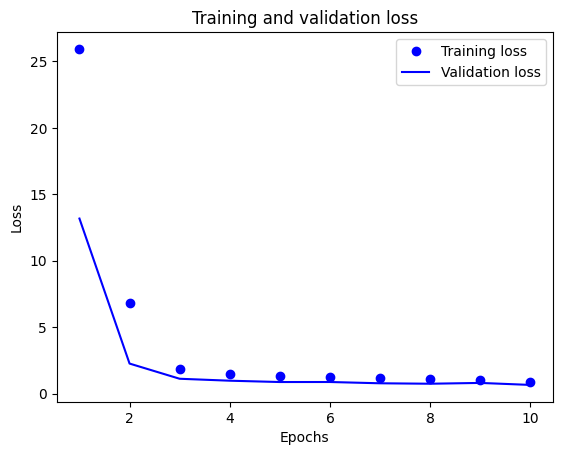

In [ ]:
dl_case_dict = dl_case.history
dl_case_dict.keys()

import matplotlib.pyplot as plt

loss_values = dl_case_dict["loss"]
val_loss_values = dl_case_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

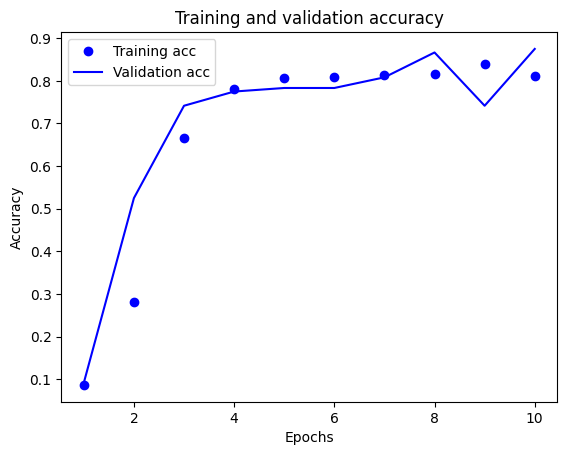

In [ ]:
plt.clf()
acc = dl_case_dict["accuracy"]
val_acc = dl_case_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_data,test_labels)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8327 - loss: 0.9043 


--------------------------------------------------------------------------------------------------------------------------------------------------------------

**< 회고 >**

- 범주형 데이터의 정규화에 대한 Step 3-4 에 대한 이해 보강 필요함:
https://pandas.pydata.org/docs/user_guide/basics.html#comparing-if-objects-are-equivalent

- 속성 변수 중 "Total" 값이 갖는 특이성에 대해 탐색적 데이터 분석에서 설명이 되었으나, 시간상 제약으로 이를 실제 분석에 이용하지 못함

- 머신러닝 결과치 (정확도) 와 딥러닝 결과치를 숫자 그대로 비교해도 되는지에 대한 확인이 필요함

- 머신러닝을 이용한 결과물의 평가 지표 (정확성 등) 개선을 위한 모델 조정 작업을 시간적 제약으로 인해 진행하지 못함